In [1]:
import pandas as pd
import numpy as np

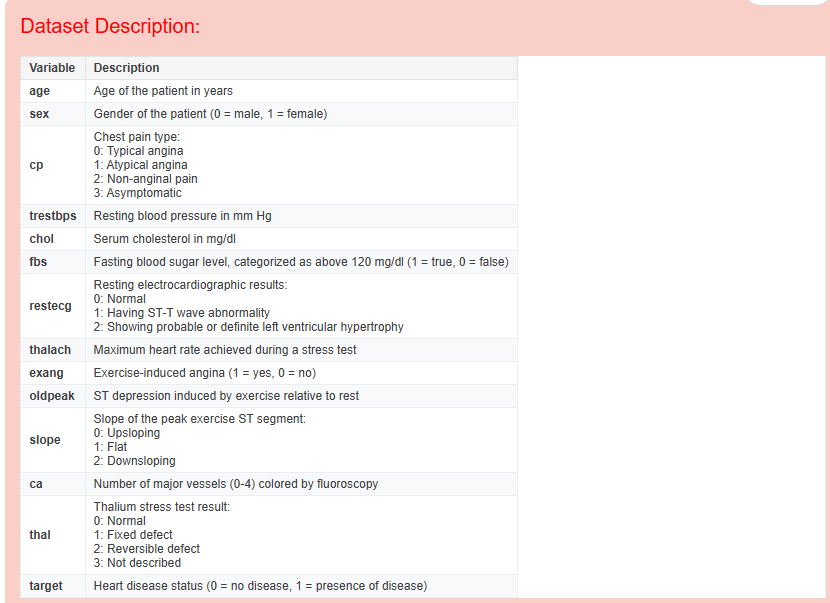

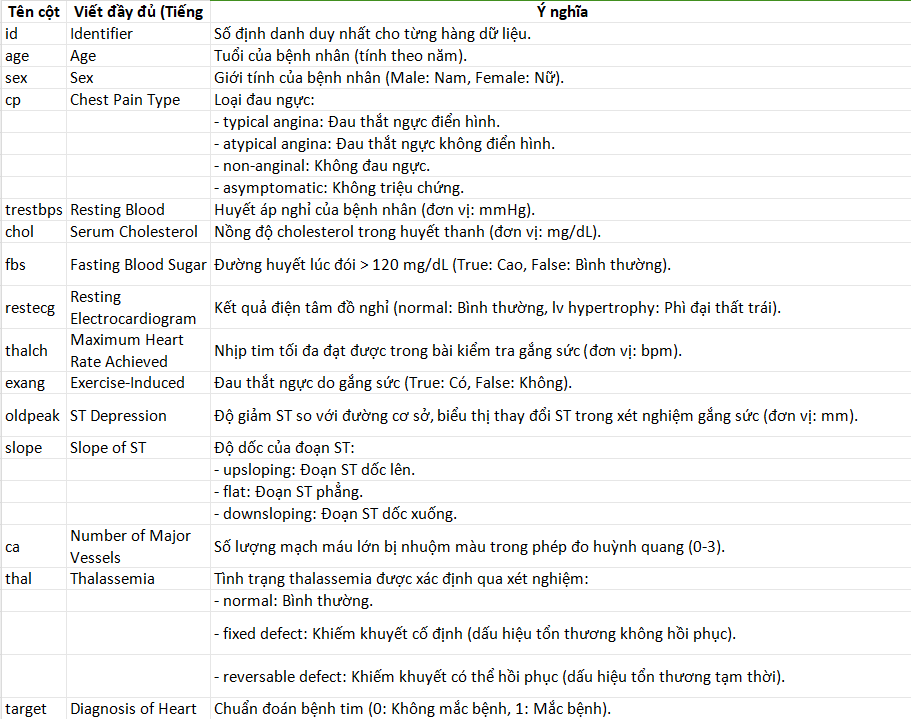

### Mô tả dữ liệu

In [2]:
df_heart = pd.read_csv('heart_disease.csv')
df_heart.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df_heart.select_dtypes(include=('int64', 'float64')).head()

,id,age,trestbps,chol,thalch,oldpeak,ca,target
0,1,63,145.0,233.0,150.0,2.3,0.0,0
1,2,67,160.0,286.0,108.0,1.5,3.0,1
2,3,67,120.0,229.0,129.0,2.6,2.0,1
3,4,37,130.0,250.0,187.0,3.5,0.0,0
4,5,41,130.0,204.0,172.0,1.4,0.0,0


In [4]:
df_heart.select_dtypes(include=('object')).head()

,sex,cp,fbs,restecg,exang,slope,thal
0,Male,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,Male,asymptomatic,False,lv hypertrophy,True,flat,normal
2,Male,asymptomatic,False,lv hypertrophy,True,flat,reversable defect
3,Male,non-anginal,False,normal,False,downsloping,normal
4,Female,atypical angina,False,lv hypertrophy,False,upsloping,normal


In [5]:
df_heart.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,target
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.553261
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,0.497426
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,1.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


In [6]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  target    920 non-null    int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 107.9+ KB


### Tách các đặc trưng số và mục lục(Categories)

In [7]:
numeric_col = ['id', 'age',	'trestbps',	'chol',	'thalch',	'oldpeak',	'ca',	'target']
numeric_col


['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']

In [8]:
categories_col = [column for column in df_heart.columns if column not in numeric_col]
categories_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [9]:
df_numeric = df_heart[numeric_col]
df_numeric = df_numeric.drop(columns='id')
df_numeric

,age,trestbps,chol,thalch,oldpeak,ca,target
0,63,145.0,233.0,150.0,2.3,0.0,0
1,67,160.0,286.0,108.0,1.5,3.0,1
2,67,120.0,229.0,129.0,2.6,2.0,1
3,37,130.0,250.0,187.0,3.5,0.0,0
4,41,130.0,204.0,172.0,1.4,0.0,0
...,...,...,...,...,...,...,...
915,54,127.0,333.0,154.0,0.0,NaN,1
916,62,NaN,139.0,NaN,NaN,NaN,0
917,55,122.0,223.0,100.0,0.0,NaN,1
918,58,NaN,385.0,NaN,NaN,NaN,0


### Numeric 

#### Kiểm tra các giá trị bằng 0
- Vì 0 đối với các chỉ số trên là 0 hợp lý điều này gây nhiễu cho bộ data trên, nên cần chuyển về Nan

In [10]:
for col in df_heart[['age', 'trestbps', 'chol', 'thalch']]:
    # Đếm số lượng giá trị 0 trước khi thay thế
    zero_count = df_heart[df_heart[col] == 0].shape[0]
    
    # Thay thế giá trị 0 bằng NaN
    df_heart[col] = df_heart[col].replace(0, np.nan)
    
    # In thông tin
    print(f"Column: {col}, Dem_GT_0: {zero_count}")


Column: age, Dem_GT_0: 0
Column: trestbps, Dem_GT_0: 1
Column: chol, Dem_GT_0: 172
Column: thalch, Dem_GT_0: 0


In [11]:
df_numeric.dtypes

age           int64
trestbps    float64
chol        float64
thalch      float64
oldpeak     float64
ca          float64
target        int64
dtype: object

#### Numeric columns

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df_heart.isna().sum()

id            0
age           0
sex           0
cp            0
trestbps     60
chol        202
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

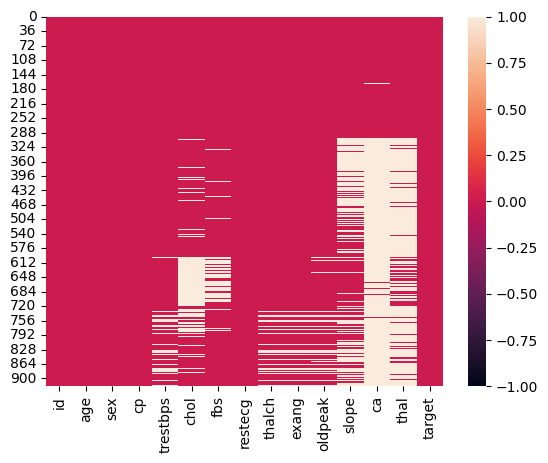

In [14]:
sns.heatmap(df_heart.isna(), vmin=-1, vmax=1);

In [15]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Áp dụng OrdinalEncoder (giữ nguyên giá trị NaN)
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Chỉ encode các cột phân loại
df_heart[categories_col] = ordinal_encoder.fit_transform(df_heart[categories_col])

df_heart.isna().sum()


id            0
age           0
sex           0
cp            0
trestbps     60
chol        202
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

In [17]:
df_heart.tail(50) 

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
870,871,41,1.0,0.0,150.0,171.0,0.0,1.0,128.0,1.0,1.5,1.0,NaN,NaN,0
871,872,71,1.0,0.0,130.0,221.0,0.0,2.0,115.0,1.0,0.0,NaN,NaN,NaN,1
872,873,38,1.0,0.0,110.0,289.0,0.0,1.0,105.0,1.0,1.5,0.0,NaN,NaN,1
873,874,55,1.0,0.0,158.0,217.0,0.0,1.0,110.0,1.0,2.5,1.0,NaN,NaN,1
874,875,56,1.0,0.0,128.0,223.0,0.0,2.0,119.0,1.0,2.0,0.0,NaN,NaN,1
875,876,69,1.0,0.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
876,877,64,1.0,0.0,150.0,193.0,0.0,2.0,135.0,1.0,0.5,1.0,NaN,NaN,1
877,878,72,1.0,0.0,160.0,NaN,1.0,0.0,130.0,0.0,1.5,NaN,NaN,NaN,1
878,879,69,1.0,0.0,NaN,210.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1
879,880,56,1.0,0.0,NaN,282.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [507]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    float64
 3   cp        920 non-null    float64
 4   trestbps  860 non-null    float64
 5   chol      718 non-null    float64
 6   fbs       830 non-null    float64
 7   restecg   918 non-null    float64
 8   thalch    865 non-null    float64
 9   exang     865 non-null    float64
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    float64
 12  ca        309 non-null    float64
 13  thal      434 non-null    float64
 14  target    920 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 107.9 KB


In [508]:
# def handle_outliers(data, columns, method='clip', threshold=1.5):
#     for col in columns:
#         if col in data.columns:
#             # Tính toán IQR
#             Q1 = data[col].quantile(0.25)
#             Q3 = data[col].quantile(0.75)
#             IQR = Q3 - Q1
#             lower_bound = Q1 - 1.5 * IQR
#             upper_bound = Q3 + 1.5 * IQR
            
#             # Xử lý theo phương pháp
#             if method == 'clip':
#                 data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
#             elif method == 'remove':
#                 data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
#             elif method == 'replace_with_median':
#                 median_value = data[col].median()
#                 data.loc[data[col] < lower_bound, col] = median_value
#                 data.loc[data[col] > upper_bound, col] = median_value
    
#     return data

# # Áp dụng hàm xử lý outliers trên các cột số
# cleaned_data = handle_outliers(df_heart.copy(), columns=numeric_col, method='clip')

# # Kiểm tra lại dữ liệu sau khi xử lý
# cleaned_data.describe()


In [509]:
df_numeric.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target'], dtype='object')

In [510]:
corr = df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']].corr()
corr

,age,trestbps,chol,thalch,oldpeak,ca,target
age,1.000000,0.253042,0.083326,-0.365778,0.258243,0.370416,0.282700
trestbps,0.253042,1.000000,0.088763,-0.102427,0.171562,0.093705,0.116959
chol,0.083326,0.088763,1.000000,-0.047186,0.046960,0.127798,0.118327
thalch,-0.365778,-0.102427,-0.047186,1.000000,-0.151174,-0.264094,-0.394503
oldpeak,0.258243,0.171562,0.046960,-0.151174,1.000000,0.281817,0.385528
ca,0.370416,0.093705,0.127798,-0.264094,0.281817,1.000000,0.455599
target,0.282700,0.116959,0.118327,-0.394503,0.385528,0.455599,1.000000


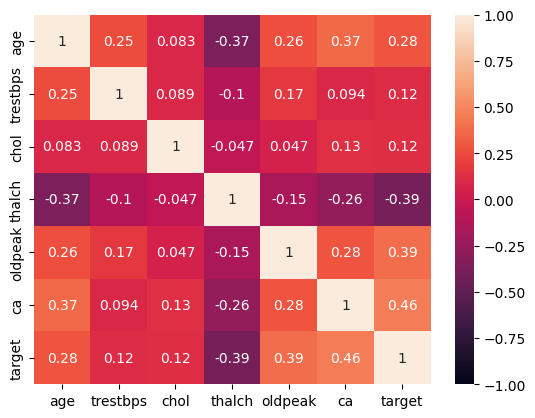

In [511]:
sns.heatmap(data=corr, annot=True,
            vmin=-1, vmax=1);

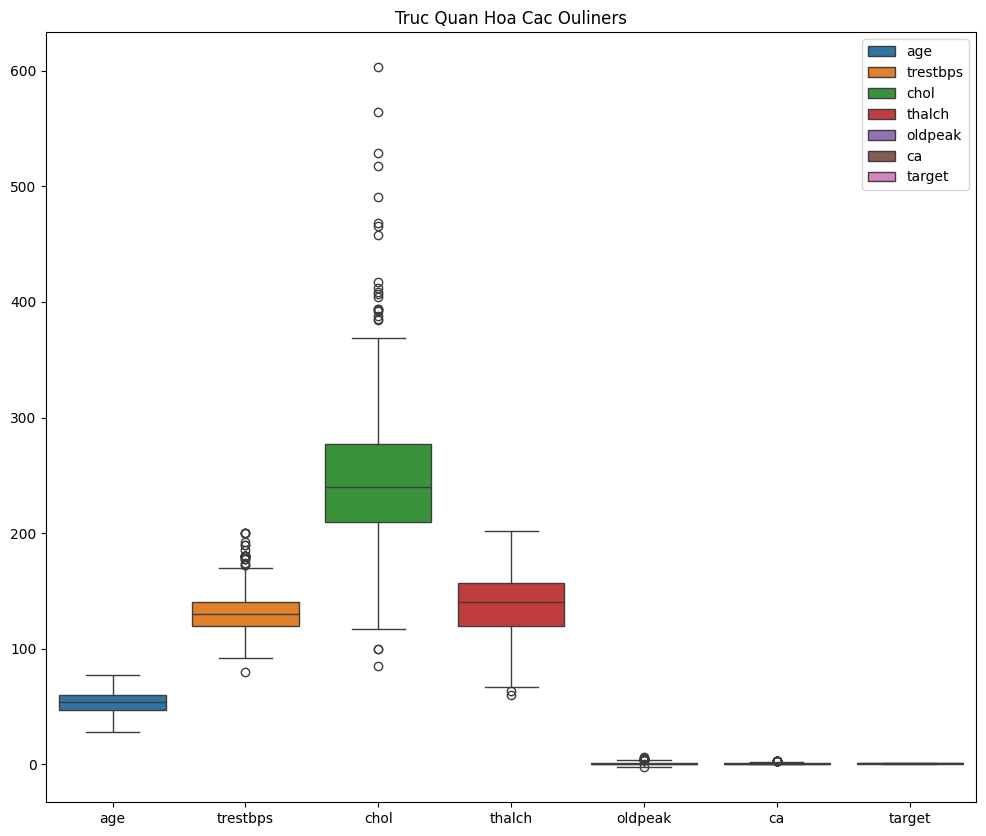

In [512]:
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']], legend=True);
ax.set(title="Truc Quan Hoa Cac Ouliners");
# ax.get_xticklabels('')

In [513]:
df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']].describe()

,age,trestbps,chol,thalch,oldpeak,ca,target
count,920.000000,860.000000,718.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.286047,246.832869,137.545665,0.878788,0.676375,0.553261
std,9.424685,18.536175,58.527062,25.926276,1.091226,0.935653,0.497426
min,28.000000,80.000000,85.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,210.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,239.500000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,276.750000,157.000000,1.500000,1.000000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


In [514]:
def detect_outliners_without_nan(x):
    # Bỏ qua giá trị NaN khi tính toán
    q1 = np.nanquantile(x, 0.25)
    q3 = np.nanquantile(x, 0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    return x[(x<lower_bound)|(x>upper_bound)]
print(detect_outliners_without_nan(df_heart['chol']))
# print(detect_outliners_without_nan(df_heart['trestbps']).value_counts().sum())
# print(detect_outliners_without_nan(df_heart['thalch']).value_counts().sum())
# print(detect_outliners_without_nan(df_heart['oldpeak']).value_counts().sum())
# print(detect_outliners_without_nan(df_heart['ca']).value_counts().sum())

48     417.0
121    407.0
152    564.0
173    394.0
181    409.0
373    412.0
431    100.0
434    468.0
461    394.0
473     85.0
500    466.0
528    529.0
531    392.0
546    603.0
566    404.0
568    518.0
576    388.0
584    491.0
595    393.0
748    100.0
800    458.0
802    384.0
918    385.0
Name: chol, dtype: float64


In [515]:
outliers_dict = {}
for col in df_numeric.columns:
    outliers_dict[col] = detect_outliners_without_nan(df_heart[col]).value_counts().sum()
outliers_dict

{'age': np.int64(0),
 'trestbps': np.int64(27),
 'chol': np.int64(23),
 'thalch': np.int64(2),
 'oldpeak': np.int64(16),
 'ca': np.int64(20),
 'target': np.int64(0)}

In [516]:
# # loại bỏ outliers
# for col in df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']]:
#     q1 = df_heart[col].quantile(0.25)
#     q3 = df_heart[col].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr

#     # Lọc dữ liệu trong khoảng hợp lý
#     # kết hợp giữ lại điều kiện nan và khoảng tứ phân vị
#     df_heart = df_heart[(df_heart[col].isna()) | (df_heart[col] >= lower_bound) & (df_heart[col] <= upper_bound)]

# df_heart

In [517]:
# loại bỏ outliers
for col in df_heart[['chol']]:
    q1 = df_heart[col].quantile(0.25)
    q3 = df_heart[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Lọc dữ liệu trong khoảng hợp lý
    # kết hợp giữ lại điều kiện nan và khoảng tứ phân vị
    df_heart = df_heart[(df_heart[col].isna()) | (df_heart[col] >= lower_bound) & (df_heart[col] <= upper_bound)]

df_heart

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0
1,2,67,1.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,1
2,3,67,1.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1
3,4,37,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0
4,5,41,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,915,46,1.0,0.0,134.0,310.0,0.0,1.0,126.0,0.0,0.0,NaN,NaN,1.0,1
915,916,54,0.0,0.0,127.0,333.0,1.0,2.0,154.0,0.0,0.0,NaN,NaN,NaN,1
916,917,62,1.0,3.0,NaN,139.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,1.0,0.0,122.0,223.0,1.0,2.0,100.0,0.0,0.0,NaN,NaN,0.0,1


#### Xử lý outliners


In [518]:
# def bound(x):
#     # Bỏ qua giá trị NaN khi tính toán
#     q1 = np.nanquantile(x, 0.25)  # Tính Q1, bỏ qua NaN
#     q3 = np.nanquantile(x, 0.75)  # Tính Q3, bỏ qua NaN
#     IQR = q3 - q1
#     lower_bound = q1 - 1.5 * IQR
#     upper_bound = q3 + 1.5 * IQR
#     return [lower_bound, upper_bound]



In [519]:
# outliers = {}
# for col in numeric_col:
#     Q1 = df_numeric[col].quantile(0.25)
#     Q3 = df_numeric[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers[col] = df_numeric[(df_numeric[col] < lower_bound) | (df_numeric[col] > upper_bound)]


# # df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

# data_cleaned = df_numeric.copy()
# data_cleaned

In [520]:
# data_cleaned = df_numeric.copy()
# for col in numeric_col:
#     Q1 = df_numeric[col].quantile(0.25)
#     Q3 = df_numeric[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     data_cleaned = data_cleaned[(data_cleaned[col] >= lower_bound) & (data_cleaned[col] <= upper_bound)]


# data_cleaned

In [521]:
df_heart.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
count,897.000000,897.000000,897.000000,897.000000,838.000000,695.000000,809.000000,895.000000,843.000000,843.000000,836.000000,597.000000,303.000000,425.000000,897.000000
mean,459.897436,53.499443,0.793757,0.791527,132.140811,241.820144,0.164400,0.995531,137.600237,0.389087,0.876794,1.234506,0.669967,1.336471,0.552954
std,266.690289,9.441446,0.404833,0.960152,18.548570,46.661058,0.370868,0.632793,26.040127,0.487832,1.093207,0.622790,0.929638,0.656759,0.497465
min,1.000000,28.000000,0.000000,0.000000,80.000000,117.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000
25%,230.000000,47.000000,1.000000,0.000000,120.000000,209.000000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,457.000000,54.000000,1.000000,0.000000,130.000000,237.000000,0.000000,1.000000,140.000000,0.000000,0.500000,1.000000,0.000000,1.000000,1.000000
75%,692.000000,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,158.000000,1.000000,1.500000,2.000000,1.000000,2.000000,1.000000
max,920.000000,77.000000,1.000000,3.000000,200.000000,369.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


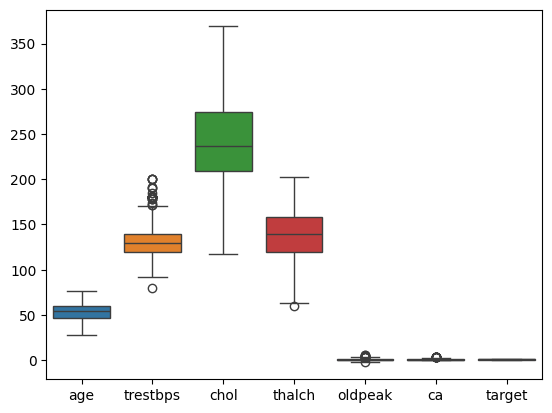

In [522]:
sns.boxplot(data=df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']]);

In [523]:
# Dung MICE dien Missing Data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Khởi tạo MICE imputer
imputer = IterativeImputer(max_iter=20, random_state=0)
df_heart = imputer.fit_transform(df_heart)
df_heart = pd.DataFrame(df_heart, columns=['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                                            'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])
df_heart.head(50)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1.0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0.0
1,2.0,67.0,1.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,1.0
2,3.0,67.0,1.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1.0
3,4.0,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0.0
4,5.0,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0.0
5,6.0,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,1.0,0.0
6,7.0,62.0,0.0,0.0,140.0,268.0,0.0,0.0,160.0,0.0,3.6,0.0,2.0,1.0,1.0
7,8.0,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,1.0,0.0
8,9.0,63.0,1.0,0.0,130.0,254.0,0.0,0.0,147.0,0.0,1.4,1.0,1.0,2.0,1.0
9,10.0,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,2.0,1.0


In [524]:
df_heart.isna().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [525]:
# df_heart = round(df_heart)
df_heart.round()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1.0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.0,0.0,0.0,0.0,0.0
1,2.0,67.0,1.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,2.0,1.0,3.0,1.0,1.0
2,3.0,67.0,1.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,3.0,1.0,2.0,2.0,1.0
3,4.0,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,4.0,0.0,0.0,1.0,0.0
4,5.0,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,915.0,46.0,1.0,0.0,134.0,310.0,0.0,1.0,126.0,0.0,0.0,1.0,1.0,1.0,1.0
893,916.0,54.0,0.0,0.0,127.0,333.0,1.0,2.0,154.0,0.0,0.0,1.0,1.0,1.0,1.0
894,917.0,62.0,1.0,3.0,134.0,139.0,0.0,2.0,126.0,0.0,0.0,1.0,1.0,1.0,0.0
895,918.0,55.0,1.0,0.0,122.0,223.0,1.0,2.0,100.0,0.0,0.0,1.0,1.0,0.0,1.0


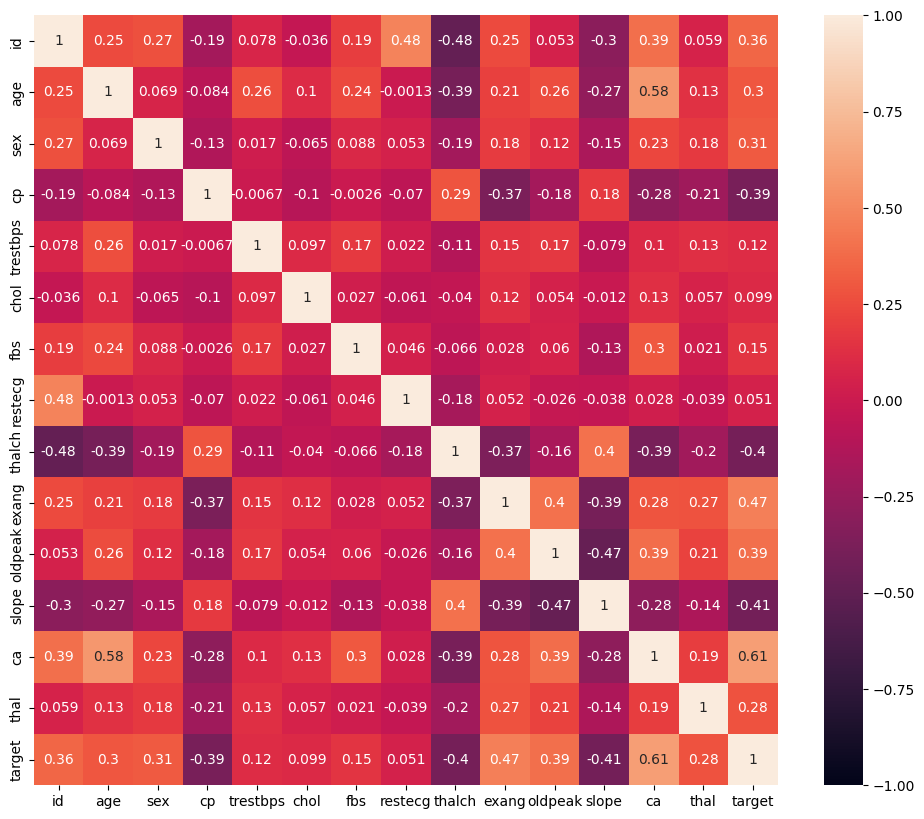

In [526]:
plt.figure(figsize=(12,10))
sns.heatmap(df_heart.corr(), annot=True, vmin=-1, vmax=1);

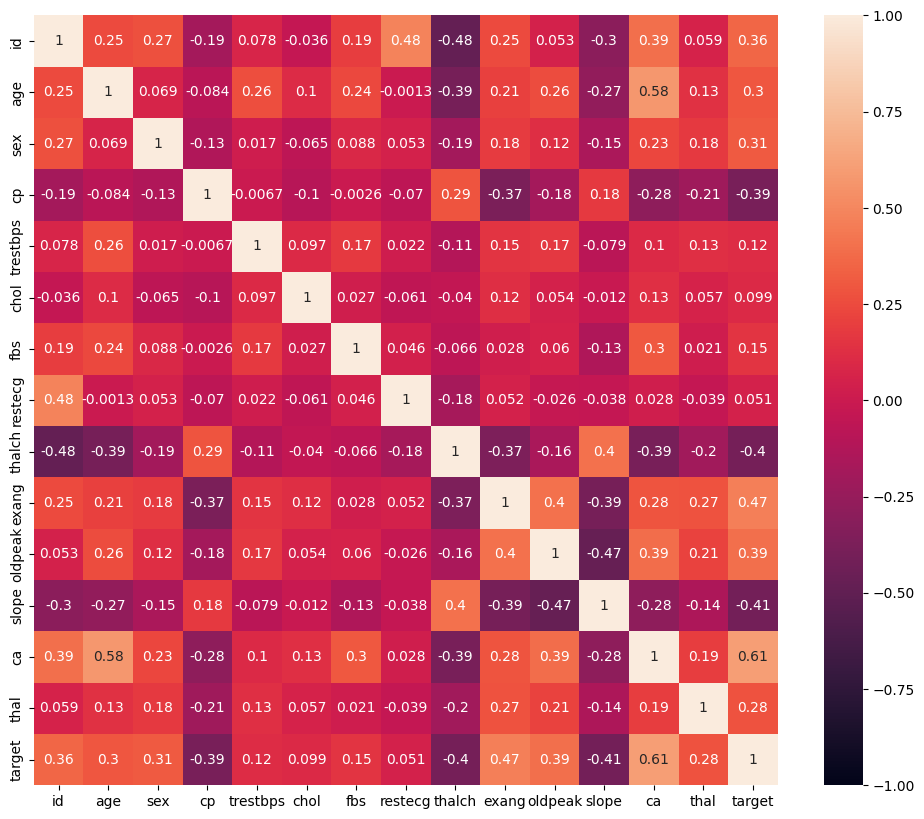

In [527]:
plt.figure(figsize=(12,10))
sns.heatmap(df_heart.corr(), annot=True, vmin=-1, vmax=1);

In [528]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from scipy.stats import shapiro, bartlett
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.formula.api import ols
# from sklearn.feature_selection import f_regression


# X = df_heart.drop(columns=['target'])
# y = df_heart['target']

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # pca 
# pca = PCA()
# pca.fit(X_scaled)


# # Ti le phuong sai
# # Khoant tin cay
# explained_var = pca.explained_variance_ratio_
# print(f'Ty le phuong sai giai thich', explained_var)


# # chon tren phuong sai tich luy
# cumsum_explained_var = np.cumsum(pca.explained_variance_ratio_)
# print(f'Phuong sai tich luy', cumsum_explained_var)

# # lua chon thanh phan chinh
# n_components = np.argmax(cumsum_explained_var >= 0.8)+1
# print(f'So luong thanh phan chinh duoc chon la: {n_components}')


# pca= PCA(n_components=n_components)
# X_pca_reduced = pca.fit_transform(X_scaled)
# print(X_pca_reduced)


# model = LogisticRegression(fit_intercept=True)
# model.fit(X_pca_reduced, y)
# a = model.intercept_
# b=model.coef_
# print(a, b)



# model_pca = ols('y~X_pca_reduced', data=df_heart).fit()
# print(model_pca.summary())

## Logictis Regression

In [529]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.formula.api import ols
# from scipy.stats import shapiro, bartlett
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.feature_selection import f_regression


In [530]:
X = df_heart.drop(columns=['target'])
y = df_heart['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.72167291,  1.00682221,  0.50973666, ..., -2.3988419 ,
        -1.09577058, -2.86238286],
       [-1.71792115,  1.43072248,  0.50973666, ..., -0.54472073,
         3.07842276, -0.70095139],
       [-1.71416939,  1.43072248,  0.50973666, ..., -0.54472073,
         1.68702498,  1.46048008],
       ...,
       [ 1.71493898,  0.90084714,  0.50973666, ..., -0.04804254,
        -0.18655063, -0.44608684],
       [ 1.71869074,  0.15902167,  0.50973666, ..., -0.35396105,
         0.8351506 , -2.86238286],
       [ 1.72619426,  0.90084714,  0.50973666, ..., -0.68023023,
         0.87487371,  0.14526693]])

In [531]:
# pca 
pca = PCA()
pca.fit(X_scaled)

PCA()

In [532]:
# Ti le phuong sai
# Khoant tin cay
explained_var = pca.explained_variance_ratio_
print(f'Ty le phuong sai giai thich', explained_var)

Ty le phuong sai giai thich [0.25350351 0.10924564 0.09599767 0.07592013 0.07093689 0.0687054
 0.05942983 0.0553865  0.05057277 0.04896809 0.03660282 0.02898128
 0.02751443 0.01823505]


In [533]:
# chon tren phuong sai tich luy
cumsum_explained_var = np.cumsum(pca.explained_variance_ratio_)
print(f'Phuong sai tich luy', cumsum_explained_var)

Phuong sai tich luy [0.25350351 0.36274915 0.45874682 0.53466696 0.60560385 0.67430925
 0.73373908 0.78912557 0.83969834 0.88866643 0.92526925 0.95425053
 0.98176495 1.        ]


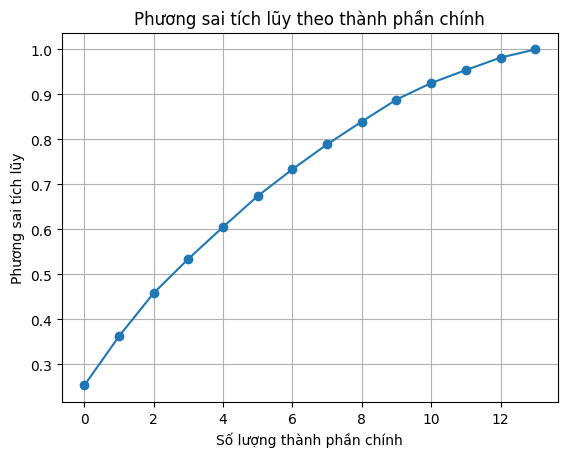

In [534]:
# Vẽ biểu đồ phương sai tích lũy
plt.plot(cumsum_explained_var, marker='o')
plt.xlabel('Số lượng thành phần chính')
plt.ylabel('Phương sai tích lũy')
plt.title('Phương sai tích lũy theo thành phần chính')
plt.grid()
plt.show()

In [535]:
# lua chon thanh phan chinh
n_components = np.argmax(cumsum_explained_var >= 0.8)+1
print(f'So luong thanh phan chinh duoc chon la: {n_components}')

So luong thanh phan chinh duoc chon la: 9


In [536]:
pca= PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X_scaled)
X_pca_reduced

array([[-0.6701942 , -1.47132343,  3.05477063, ...,  1.66509465,
         1.36322355, -1.4223707 ],
       [ 2.5194842 , -2.70220361,  0.96108646, ..., -0.81500166,
         0.5963286 , -1.7812423 ],
       [ 1.99247126, -2.92540115, -0.81133553, ..., -0.91475667,
        -0.43070299,  0.41146776],
       ...,
       [-0.07921693,  3.04586642,  0.88876771, ..., -1.56400812,
         0.74567702,  0.60225058],
       [ 1.17611932,  3.54789755,  1.5937922 , ...,  1.29284954,
        -0.65478043, -1.46898456],
       [ 1.95643442,  0.24541877, -0.33264905, ..., -1.43573496,
         1.03727133, -0.6735887 ]])

In [537]:
# Chia dữ liệu thành Train và Test
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)

# Huấn luyện Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Intercept và Coefficients
intercept = model.intercept_
coefficients = model.coef_
print(f'He so chan Intercept: {intercept}')
print(f'He So Hoi Quy Ung Voi Tung Dac Trung Coefficients: {coefficients}')
print('--================================--')
# Dự đoán trên tập Test
y_pred = model.predict(X_test)

# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print('--================================--')
print("Classification Report:\n", classification_report(y_test, y_pred))

He so chan Intercept: [0.46207]
He So Hoi Quy Ung Voi Tung Dac Trung Coefficients: [[ 1.24890902e+00 -2.14854844e-01 -2.67776126e-01 -1.82133714e-02
   3.12956897e-01 -2.69969909e-01  3.28413875e-01  1.30660748e-01
  -5.81122707e-04]]
--================================--
Accuracy: 0.8333333333333334
--================================--
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.81      0.82        85
         1.0       0.84      0.85      0.84        95

    accuracy                           0.83       180
   macro avg       0.83      0.83      0.83       180
weighted avg       0.83      0.83      0.83       180



In [538]:
for x in range(len(y_pred)):
    print(f'Du doan {y_pred[x]}, Dau vao {X_test[x]}, Dau ra {y_test.iloc[x]}')

Du doan 0.0, Dau vao [-2.18643807  0.85195498 -1.03153769 -0.68895956  0.48066519  0.15984761
  0.08715762  0.02321348 -0.28957031], Dau ra 0.0
Du doan 1.0, Dau vao [ 0.19035205  1.75920938 -0.46423004  0.33125038  0.16380492 -0.48484988
  0.13097545 -0.03936229  0.40827894], Dau ra 1.0
Du doan 0.0, Dau vao [-2.00709528e+00  1.33860165e-03 -4.26806315e-01  1.07830996e+00
  8.08770457e-01  6.91824117e-01  8.21064938e-01  1.06922782e+00
 -3.08231589e-01], Dau ra 0.0
Du doan 1.0, Dau vao [ 2.55100198  1.07810474 -0.42439454  1.48142528 -0.14341749  0.05245468
  0.0530426   0.73444342  0.320416  ], Dau ra 1.0
Du doan 1.0, Dau vao [ 0.14990549 -0.82624538  1.72597543 -0.87635207 -0.40935869  1.00173704
  1.27029035  0.1953608  -0.78206178], Dau ra 0.0
Du doan 0.0, Dau vao [-1.91555147  0.17161792 -0.0672857   0.76068471  0.44737827  1.06475881
  0.33188869  1.68454831 -0.17706923], Dau ra 0.0
Du doan 0.0, Dau vao [-0.85214355  0.38556705 -0.63521979  1.37805012 -0.81922368 -0.17375609
 -1.3

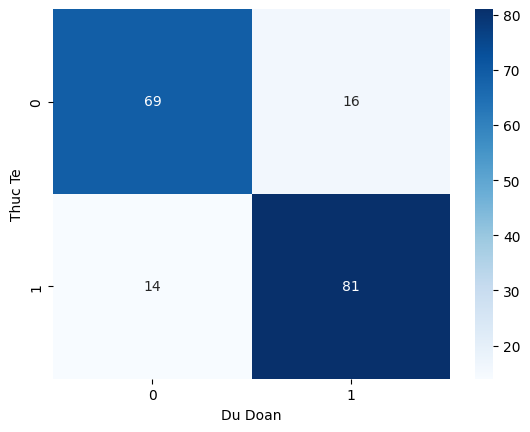

In [539]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues', annot=True);
plt.xlabel('Du Doan')
plt.ylabel("Thuc Te");

### Test

In [540]:
for
model_pca = ols('y~X_pca_reduced', data=df_heart).fit()
print(model_pca.summary())

SyntaxError: invalid syntax (2670291744.py, line 1)

In [ ]:
X_pca_reduced = np.delete(X_pca_reduced, 5, axis=1)
X_pca_reduced.shape

In [ ]:
model_pca = ols('y~X_pca_reduced', data=df_heart).fit()
print(model_pca.summary())

In [ ]:
X_pca_reduced = np.delete(X_pca_reduced, 7, axis=1)
X_pca_reduced.shape

In [ ]:
model_pca = ols('y~X_pca_reduced', data=df_heart).fit()
print(model_pca.summary())

In [ ]:
X_pca_reduced = np.delete(X_pca_reduced, 4, axis=1)
X_pca_reduced.shape

In [ ]:
model_pca = ols('y~X_pca_reduced', data=df_heart).fit()
print(model_pca.summary())

### Categories 

In [ ]:
df_categories = df_heart[categories_col]
df_categories.head()

In [ ]:
df_categories.info()

In [ ]:
df_categories.describe()

In [ ]:
df_categories.isna().sum()


In [ ]:
sns.heatmap(df_categories.isna());

In [57]:
# df_categories = pd.get_dummies(df_categories, columns=df_categories.columns, drop_first=True).astype(int)
# df_categories.isna().sum()

## Mức độ dễ (3 câu hỏi)


### Câu hỏi 1: Bao nhiêu phần trăm bệnh nhân trong dữ liệu được chẩn đoán mắc bệnh tim (target = 1)?
- Mục đích: Hiểu tỷ lệ mắc bệnh tim trong tập dữ liệu.

In [ ]:
# Phan tram benh nhan mac benh
mac_benh =(len(df_numeric[df_numeric['target']==1])/len(df_numeric))*100
print(f'Ti le mac benh la {mac_benh:.2f}%')

### Câu hỏi 2: Tỷ lệ giữa nam (Male) và nữ (Female) trong dữ liệu là bao nhiêu?
- Mục đích: Phân bố giới tính của bệnh nhân trong tập dữ liệu.

In [ ]:
# Ty le nam nu
sns.barplot(data=df_categories['sex']);

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_heart, x='cp', y='age');

### Câu hỏi 3: Độ tuổi trung bình của bệnh nhân trong dữ liệu là bao nhiêu?
- Mục đích: Hiểu nhóm tuổi phổ biến trong tập dữ liệu.

In [ ]:
df_heart['age'].mean()

## Mức độ trung bình (4 câu hỏi)


### Câu hỏi 4: Có sự khác biệt nào về tỷ lệ mắc bệnh tim (target) giữa nam và nữ không?
- Mục đích: Tìm hiểu sự liên quan giữa giới tính và khả năng mắc bệnh tim.

In [ ]:
# Tính tỷ lệ mắc bệnh tim theo giới tính
gender_target = df_heart.groupby('sex')['target'].value_counts()
print(gender_target)



In [ ]:
male = df_heart[df_heart['sex']=='Male']
male_target = df_heart[(df_heart['sex']=='Male')&(df_heart['target']==1)]
male_percent = len(male_target)/len(male)*100
print(f'Phan tram mac benh o nam la: {male_percent:.2f}%')


female = df_heart[df_heart['sex']=='Female']
female_target = df_heart[(df_heart['sex']=='Female')&(df_heart['target']==1)]
female_percent = len(female_target)/len(female)*100
print(f'Phan tram mac benh o nam la: {female_percent:.2f}%')

### Câu hỏi 5: Nhóm đau ngực nào (cp) phổ biến nhất ở những bệnh nhân không mắc bệnh tim (target = 0)?
- Mục đích: Phân tích kiểu đau ngực ở nhóm không mắc bệnh.

In [ ]:
cp_target_0=df_heart['cp'][df_heart['target']==0].value_counts()
cp_target_0

In [ ]:
df_cp_target_0 = cp_target_0.reset_index()
# Đổi tên các cột cho dễ hiểu
df_cp_target_0.columns = ['cp', 'values']
df_cp_target_0.head()

In [ ]:
sns.barplot(df_cp_target_0, x='cp', y='values');

### Câu hỏi 6: Huyết áp nghỉ (trestbps) trung bình của bệnh nhân mắc bệnh tim so với bệnh nhân không mắc bệnh có khác biệt không?
- Mục đích: Xem xét mối liên hệ giữa huyết áp và bệnh tim.

In [ ]:
trestbps_target_1 = df_heart[['trestbps']][df_heart['target']==1].mean()
trestbps_target_2 = df_heart[['trestbps']][df_heart['target']==0].mean()
print(f'''Huyet ap luc nghi cua nguoi mac benh {trestbps_target_1}\n
Huyet ap luc nghi cua nguoi ko mac benh {trestbps_target_2}''')

In [ ]:
trestbps_target_1 = df_heart[['trestbps']][df_heart['target']==1].mean()
df_trestbps_target_1 = trestbps_target_1.reset_index()
df_trestbps_target_1.columns=['index', 'values']
df_trestbps_target_1

In [ ]:
trestbps_target_2 = df_heart[['trestbps']][df_heart['target']==0].mean()
df_trestbps_target_2 = trestbps_target_2.reset_index()
df_trestbps_target_2.columns=['index', 'values']
df_trestbps_target_2

In [ ]:
df_merge_trestpbs = pd.merge(df_trestbps_target_1, df_trestbps_target_2, how='inner', on=['index'])
df_merge_trestpbs

In [ ]:
sns.barplot(data=df_merge_trestpbs);

### Câu hỏi 7: Nhóm bệnh nhân có giá trị cholesterol (chol) trung bình cao hơn hay thấp hơn những người không mắc bệnh tim?
- Mục đích: Đánh giá mối quan hệ giữa nồng độ cholesterol và bệnh tim.

In [ ]:
chol_targer_1 = df_heart['chol'][df_heart['target']==1].mean()
chol_target_0 = df_heart['chol'][df_heart['target']==0].mean()
print(chol_target_0, chol_targer_1)

In [ ]:
df_chol_target_1 = df_heart[df_heart['target']==1]
df_chol_target_1.describe(include='all')

In [ ]:
df_chol_target_0 = df_heart[df_heart['target']==0]
df_chol_target_0.describe(include='all')

In [ ]:
sns.boxplot(data=df_heart, x='target', y='chol')
plt.title('Cholesterol Distribution by Target')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Cholesterol');

In [ ]:
df_chol_target_0[df_chol_target_0[['chol']].isna().any(axis=1)]

In [ ]:
df_chol_target_0 = df_chol_target_0.dropna(subset='chol')
df_chol_target_0

In [ ]:
lower = bound(df_chol_target_0['chol'])[0]
upper = bound(df_chol_target_0['chol'])[1]
lower, upper

In [ ]:
# Loai bo outliners
df_chol_target_0